This is an example that I found from internet. https://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.Xnj6l5NKii4

I showed here that I can reproduce their results in 150 dimensions. And I showed that in lower dimension when I ask for example for 3d embedding, I get a 2d and if I ask for a 2d, I infact get a 1d embedding.

In [236]:
import gzip
import gensim 
import logging
from numpy import exp, dot,  sum as np_sum

from scipy.special import expit

from gensim import matutils 

from cell import utils
from gensim.models.callbacks import CallbackAny2Vec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import preprocessing

from cell import analysis
logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO)

In [23]:
input_file = "/Users/fahimehb/Downloads/"

In [25]:
data_file="reviews_data.txt.gz"
input_file = "/Users/fahimehb/Downloads/"

with gzip.open (input_file+'reviews_data.txt.gz', 'rb') as f:
    for i,line in enumerate (f):
        print(line)
        break

b"Oct 12 2009 \tNice trendy hotel location not too bad.\tI stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to see the historic sites in Be

In [26]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list (read_input (input_file + data_file))
logging.info ("Done reading data file")

2020-03-25 15:15:01,184 : INFO : reading file /Users/fahimehb/Downloads/reviews_data.txt.gz...this may take a while
2020-03-25 15:15:01,191 : INFO : read 0 reviews
2020-03-25 15:15:04,876 : INFO : read 10000 reviews
2020-03-25 15:15:08,011 : INFO : read 20000 reviews
2020-03-25 15:15:11,778 : INFO : read 30000 reviews
2020-03-25 15:15:15,209 : INFO : read 40000 reviews
2020-03-25 15:15:20,340 : INFO : read 50000 reviews
2020-03-25 15:15:23,088 : INFO : read 60000 reviews
2020-03-25 15:15:26,199 : INFO : read 70000 reviews
2020-03-25 15:15:28,394 : INFO : read 80000 reviews
2020-03-25 15:15:30,762 : INFO : read 90000 reviews
2020-03-25 15:15:33,901 : INFO : read 100000 reviews
2020-03-25 15:15:36,089 : INFO : read 110000 reviews
2020-03-25 15:15:38,377 : INFO : read 120000 reviews
2020-03-25 15:15:40,766 : INFO : read 130000 reviews
2020-03-25 15:15:43,696 : INFO : read 140000 reviews
2020-03-25 15:15:47,028 : INFO : read 150000 reviews
2020-03-25 15:15:49,425 : INFO : read 160000 revie

In [2]:
# len(documents)

In [ ]:
len(documents[1])

In [478]:
model_5d = gensim.models.Word2Vec(documents, size=5, window=10, min_count=2, workers=4)
model_5d.train(documents,total_examples=len(documents),epochs=10)

2020-03-27 12:26:37,679 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2020-03-27 12:26:37,681 : INFO : collecting all words and their counts
2020-03-27 12:26:37,683 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-03-27 12:26:38,079 : INFO : PROGRESS: at sentence #10000, processed 1655714 words, keeping 25777 word types
2020-03-27 12:26:38,371 : INFO : PROGRESS: at sentence #20000, processed 3317863 words, keeping 35016 word types
2020-03-27 12:26:38,726 : INFO : PROGRESS: at sentence #30000, processed 5264072 words, keeping 47518 word types
2020-03-27 12:26:39,043 : INFO : PROGRESS: at sentence #40000, processed 7081746 words, keeping 56675 word types
2020-03-27 12:26:39,387 : INFO : PROGRESS: at sentence #50000, processed 9089491 words, keeping 63744 word types
2020-03-27 12:26:39,748 : INFO : PROGRESS: at sentence #60000, processed 11013726 words, keeping 76786 word types
2020-03-27 12:26:40,141 : INFO : PROGRESS: a

(303504277, 415193580)

In [516]:
from scipy.stats import entropy
def js(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
   # normalize
    p /= p.sum()
    q /= q.sum()
    m = (p + q) / 2
    divergence = (entropy(p, m, base=2) + entropy(q, m, base=2)) / 2
    return np.sqrt(divergence)

In [517]:
from scipy.spatial import distance

which_model = model_5d
dim = 100
JSD_model_5d = []


X = which_model.wv.vectors
mu = np.mean(X, axis=0)

pca = sklearn.decomposition.PCA()
pca.fit(X)

for i in range(dim):
    nComp = dim - i
    Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
    Xhat += mu
    
    tmp1 = predict_output_probability(which_model, X, ["dog"])
    tmp1 = [j for (i, j) in tmp1]
    tmp2 = predict_output_probability(which_model, Xhat, ["dog"])
    tmp2 = [j for (i, j) in tmp2]
    
    JSD_model_5d.append(js(tmp1, tmp2))

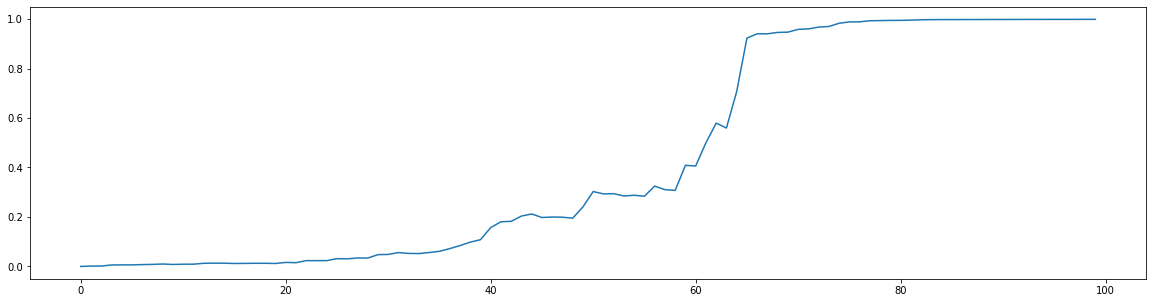

In [529]:
plt.figure(figsize=(20,5))
plt.plot(JSD_model_100d)

In [528]:
JSD_model_100d[0:10]

[1.6765579577731274e-06,
 0.0016535108015997865,
 0.0016429019336364733,
 0.005955599897284505,
 0.006366754873686899,
 0.006325104726765435,
 0.007451267177731883,
 0.00831912390713092,
 0.009819783330811032,
 0.008035195687493314]

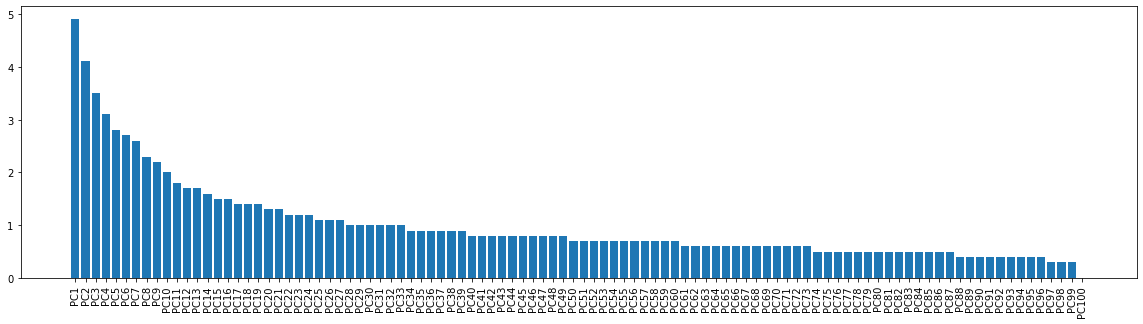

In [155]:
scaled_data = preprocessing.StandardScaler().fit_transform(model_3d.wv.vectors)
pca = PCA(n_components=100)
pca.fit(model_100d.wv.vectors)
pca_data = pca.transform(model_100d.wv.vectors)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.xticks(rotation = 90)
plt.show()

[ 0.6008141   3.859265   -1.1341274  -0.44783366 -1.758973    1.3566623
  0.2818223   0.92805064  1.3824095   0.8765874   0.4438091  -2.061079
  0.864807   -0.07731403 -1.4512575   2.0476043   0.64658606 -1.0160862
 -1.0663016  -0.35337004 -0.27282754 -1.9288652   1.6968054  -1.2437261
 -2.1578197  -0.6340673   1.7377188   1.4667176   0.49834928  1.1180557
  0.30068794 -0.65396196  1.3036858  -0.671957   -1.0056709  -0.91844434
  0.68643403 -0.71865654 -1.6888463  -0.72754174 -0.701666   -0.19486605
 -0.811794   -0.16120675  0.7206251   1.148855   -2.5138571   1.1237164
  0.17102273  0.25417158 -0.2876247  -0.35930395  4.5712676   1.0387042
  1.1074654   0.76369506 -2.764365   -0.6611938  -0.71945554 -0.9050844
  1.7632262   0.8488692  -0.712858   -0.43855283  0.93866533 -0.42640907
 -0.9452887  -3.4175484  -0.9373378  -1.3074604   0.5410986  -3.0709658
  1.5516828  -1.3070302  -2.3087654   1.2310364   0.2433019  -0.03083044
 -0.963445   -1.1392295  -0.8223318  -0.55009174 -0.16061768 

In [189]:
model_100d.wv.vectors = Xhat

In [190]:
model_100d.wv.syn0

/Users/fahimehb/anaconda3/envs/py374/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


array([[ 5.6622446e-01,  3.8878856e+00, -1.0998926e+00, ...,
         3.7262684e-01,  1.3902330e-01, -1.6415857e+00],
       [ 2.1772647e+00,  3.8074613e-01,  1.4412972e-01, ...,
         2.3002796e-02,  7.7328330e-01, -3.8916770e-01],
       [-5.1459332e+00, -2.2899041e+00, -2.0242031e+00, ...,
        -4.1633129e+00,  4.3005395e+00, -2.1065516e+00],
       ...,
       [-9.0639457e-02, -8.7764896e-02,  9.5182337e-02, ...,
         9.7007379e-03, -1.2865053e-01, -7.0058107e-03],
       [ 1.1885799e-03, -2.7879763e-02,  3.2158874e-02, ...,
         3.7964575e-02,  6.7425720e-02,  6.1111152e-04],
       [ 3.0850310e-02,  1.1252314e-02, -1.5610611e-01, ...,
         8.6928234e-02, -2.5955141e-02,  4.0608197e-02]], dtype=float32)

In [40]:
w1 = "dirty"
model_2d.wv.most_similar (positive=w1)

2020-03-25 15:40:55,130 : INFO : precomputing L2-norms of word weight vectors


[('filthy', 0.9010952711105347),
 ('unclean', 0.82561856508255),
 ('dusty', 0.8160609602928162),
 ('grubby', 0.8150526285171509),
 ('stained', 0.8148162961006165),
 ('smelly', 0.7951182126998901),
 ('grimy', 0.783523440361023),
 ('dingy', 0.7683923244476318),
 ('soiled', 0.7650967240333557),
 ('gross', 0.7480664253234863)]

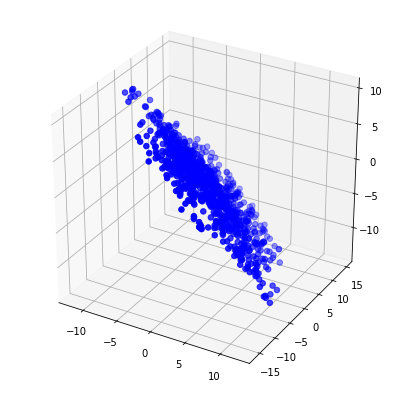

In [12]:
fig = plt.figure(figsize=(7,7))

data = analysis.summarize_walk_embedding_results(gensim_dict={"base":model_2d}, ndim=3)
data = data[100:1000]
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data['Z0'], data['Z1'], data['Z2'],  s=30, c="blue")

plt.show()